In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
from netCDF4 import Dataset
import xarray as xr
from cartopy.feature import NaturalEarthFeature
import warnings
import os
import sys

warnings.filterwarnings("ignore")

%matplotlib inline

# Options to print figures into notebook/increase size
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 16})

# An option to keep numpy from printing in scientific notation by default:
np.set_printoptions(suppress=True)

In [35]:
def get_product(file_list, data_field, multiplier, color_range, current_folder):
    data_list, lat_list, long_list = [], [], []
    for file in file_list:
        fname='data/' + current_folder + '/' + file
        file_id = Dataset(fname)
        
        
        print(file_id.variables['Latitude'][:,:])
        print(' ')
        print(file_id.variables['Longitude'])
        print(' ')
        print(file_id.variables[data_field])
        print(' ')
        
        data = file_id.variables[data_field][:,:]
        lat = pd.DataFrame(file_id.variables['Latitude'][:,:])
        long = pd.DataFrame(file_id.variables['Longitude'][:,:])
        data = pd.DataFrame(data)
        
        print(lat)
        print(long)
        print(data)
        
        
        
        data_list.append(data * multiplier)
        lat_list.append(lat)
        long_list.append(long)
       
    levs = np.arange(color_range[0], color_range[1], color_range[2])
    return long_list, lat_list, data_list, levs, data_field

In [36]:
def plt_map(long_list, lat_list, data_list, levs, data_field, colorbar_label, current_folder):
    # Using cartopy, create the map projection and plot the data
    to_proj=ccrs.PlateCarree()
    ax = plt.axes(projection=to_proj)
    
    #projection=to_proj
    ax.coastlines('50m')
    ax.gridlines(draw_labels=True, linewidth=.5, color='grey', linestyle='--')
    states = NaturalEarthFeature(category="cultural", scale="50m",
                                 facecolor="none",
                                 name="admin_1_states_provinces_shp")
    ax.add_feature(states, linewidth=.5, edgecolor="black")# Can change color scheme using the get_cmap command
    for i, n in enumerate(data_list):
        x1 = plt.contourf(long_list[i], lat_list[i], data_list[i], levs, transform=to_proj, cmap=plt.get_cmap("rainbow"))
    
    plt.colorbar(x1, orientation="horizontal", fraction=0.05).set_label(colorbar_label)

    # The 4 corners from the 3 km WRF domain are (latitude, longitude) = 
    # (31.612877, -87.34198), (31.612877, -64.65802), (50.870567, -91.42612) 
    # and (50.870567, -60.573883).
    xmin,xmax,ymin,ymax = -92, -59, 30, 51
    #xmin,xmax,ymin,ymax = -100, 0, -100, -25
    plt.axis([xmin,xmax,ymin,ymax])
    plt.title(current_folder + ' ' + data_field.replace('_', ' ').title(), y=1.1)
    output_figure = plt.gcf()
    plt.show()
    #output_figure.savefig('C:\\Users\\Ryan\\Desktop\\NOAA Projects\\NOAA Python Project\\Python Test\\End Product\\' + current_folder + ' ' + data_field.replace('_', ' ').title() + '.png')

In [37]:
def run_program(file_list, data_field, multiplier, color_range, colorbar_label, current_folder):
    long_list, lat_list, data_list, levs, data_field = get_product(file_list, data_field, multiplier, color_range, current_folder)
    plt_map(long_list, lat_list, data_list, levs, data_field, colorbar_label, current_folder)

[[34.870304 34.870113 34.869934 ... 30.004505 29.999605 29.994677]
 [34.885033 34.88483  34.884636 ... 30.01849  30.01359  30.008705]
 [34.899754 34.899548 34.89933  ... 30.032454 30.027609 30.022718]
 ...
 [39.876453 39.87641  39.876366 ... 34.71137  34.70604  34.70069 ]
 [39.891186 39.89114  39.89108  ... 34.725124 34.7198   34.71449 ]
 [39.905922 39.905853 39.90579  ... 34.73885  34.733555 34.72824 ]]
 
<class 'netCDF4._netCDF4.Variable'>
float32 Longitude(Rows, Columns)
    long_name: Longitude
    units: degrees_east
    comments: Pixel longitude in field Longitude (degree)
    _FillValue: -999.0
    valid_range: [-180.  180.]
unlimited dimensions: 
current shape = (768, 3200)
filling on
 
<class 'netCDF4._netCDF4.Variable'>
int8 Smoke(Rows, Columns)
    long_name: Smoke Flag: 1 Yes, 0 No
    coordinates: Longitude Latitude
    units: 1
    _FillValue: -128
    valid_range: [0 1]
unlimited dimensions: 
current shape = (768, 3200)
filling on
 
          0          1          2     

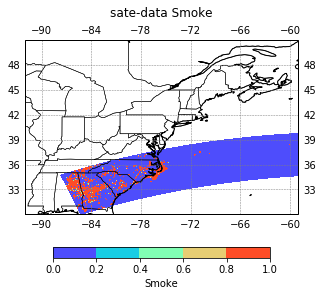

In [38]:
for folder_name in os.listdir('data/'):
    if '-' in  folder_name:
        current_folder = folder_name
        aer_list, co_list, hcho_list, no2_list, adp_list = [], [], [], [], []
        for x in os.listdir('data/' + current_folder + '/'):
            name = x.lower()
            if 'aer' in name:
                aer_list.append(x)
            elif 'co' in name:
                co_list.append(x)
            elif 'hcho' in name:
                hcho_list.append(x)
            elif 'no2' in name:
                no2_list.append(x)
            elif 'adp' in name:
                adp_list.append(x)
        if aer_list:
            pass
            data_field = 'aerosol_index_354_388'
            multiplier = 1
            color_range = [0, 4.5, .5]
            colorbar_label = 'Aerosol Index'
            run_program(aer_list, data_field, multiplier, color_range, colorbar_label, current_folder)
            data_field = 'aerosol_index_340_380'
            run_program(aer_list, data_field, multiplier, color_range, colorbar_label, current_folder)
        if co_list:
            pass
            data_field = 'carbonmonoxide_total_column'
            multiplier = 60.22141
            color_range = [0, 3.5, .5]
            colorbar_label = '10¹⁸ Molecules cm⁻²'
            run_program(co_list, data_field, multiplier, color_range, colorbar_label, current_folder)      
        if hcho_list:
            pass
            data_field = 'formaldehyde_tropospheric_vertical_column'
            multiplier = 6.022141 * 2241.15
            color_range = [0, 50, 5]
            colorbar_label = '10¹⁹ Molecules cm⁻²'
            run_program(hcho_list, data_field, multiplier, color_range, colorbar_label, current_folder)
        if no2_list:
            data_field = 'nitrogendioxide_tropospheric_column'
            multiplier = 60221.41
            color_range = [0, 10, 1]
            colorbar_label = '10¹⁵ Molecules cm⁻²'
            run_program(no2_list, data_field, multiplier, color_range, colorbar_label, current_folder)
        if adp_list:
            data_field = 'Smoke'
            multiplier = 1
            color_range = [0, 1.2, .2]
            colorbar_label = 'Smoke'
            run_program(adp_list, data_field, multiplier, color_range, colorbar_label, current_folder)


In [12]:
# aerosol_index_354_388, aerosol_index_340_380, nitrogendioxide_tropospheric_column, formaldehyde_tropospheric_vertical_column, carbonmonoxide_total_column 